# Fundamentals of Data Analysis Tasks

**Declan Fox**

## Task 1: The Collatz Conjecture

>The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive >integer $x$ and repeatedly apply the function $f(x)$ below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .
>$$ f(x) = 
>\begin{cases}
>{x ÷ 2}, & \text{if x is even} \\
>{3x + 1}, & \text{otherwise}
>\end{cases} $$
>For example, starting with the value 10, which is an even number,
>we divide it by 2 to get 5. Then 5 is an odd number so, we multiply by 3 and add 1 to get 16. Then we repeatedly divide by 2 to
>get 8, 4, 2, 1. Once we are at 1, we go back to 4 and get stuck in the
>repeating sequence 4, 2, 1 as we suspected.
>This task is to verify, using Python, that the conjecture is true for
>the first 10,000 positive integers.


In [1]:
def f(x):
    #if x is even, divide by 2
    if x % 2 == 0:
        return x // 2
    else:
        return (3 * x) + 1

The following function will return a list of all the integers resulting from testing Collatz for a given integer $x$

In [2]:
def collatz(x):
    ints = []
    while x != 1:
        x = f(x)
        ints.append(x)
    return ints

In [3]:
for i in range(1, 5):
    print(f'Output for positive integer {i}:')
    print(collatz(i))

Output for positive integer 1:
[]
Output for positive integer 2:
[1]
Output for positive integer 3:
[10, 5, 16, 8, 4, 2, 1]
Output for positive integer 4:
[2, 1]


As we have tested integers 1 to 4 and found that they uphold the Collatz conjecture and assuming that if a list of integers resulting from calculating an integer that is $> 4$ and is Collatz compliant ends in $4, 2, 1$ then the conjecture is true for that integer.

In [4]:
# test numbers 4 to 10000
for i in range(1, 10001):
    if i > 4:
        # check last 3 numbers
        if (collatz(i)[-3:]) == [4, 2, 1]:
            latest_num = i
        else: break # exit loop if last 3 numbers of list are not 4, 2 and 1
print(f'numbers 1 to {latest_num}: are Collatz Compliant')

numbers 1 to 10000: are Collatz Compliant


## Task 2: Penguins Dataset - Overview & Variable Types

> Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale.

#### Overview
The Palmer Archipelago (Antarctica) penguin dataset consists of penguin data collected in antarctica. It consists of data for 344 penguins in the following 7 columns:

species - Adélie, Chinstrap or Gentoo

island - Biscoe, Dream or Torgersen

bill_length_mm - bill length in millimeters 

bill_depth_mm - bill depth in millimeters

flipper_length_mm - flipper length in millimeters

body_mass_g - body mass grams

sex -  female or male

The penguin dataset is becoming popular as a replacement for the Fisher's Iris Dataset due to Fishers dataset's links to eugenics.

https://towardsdatascience.com/penguins-dataset-overview-iris-alternative-9453bb8c8d95
https://www.researchgate.net/profile/Kristen-B-Gorman/publication/362573623_Palmer_Archipelago_Penguins_Data_in_the_palmerpenguins_R_Package_-_An_Alternative_to_Anderson's_Irises/links/63100bec1ddd44702125ddbc/Palmer-Archipelago-Penguins-Data-in-the-palmerpenguins-R-Package-An-Alternative-to-Andersons-Irises.pdf
https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

#### Download dataset

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

use info() method to get data frame information, such as column names, column data types and number of non-null rows in each column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Unique values

In [8]:
# number of species
a = df['species'].unique()
# number of islands
b = df['island'].unique()
print(f'Species: {a}\nIslands: {b}')
#number male vs. female
df.sex.value_counts()

Species: ['Adelie' 'Chinstrap' 'Gentoo']
Islands: ['Torgersen' 'Biscoe' 'Dream']


MALE      168
FEMALE    165
Name: sex, dtype: int64

We can see from above that all the measurement datatypes are floats and the othe variables are strings

## Task 3: Penguins Data Set - Probability Distributions

> For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list is the most appropriate to model the variable.

#### quick histogram plots

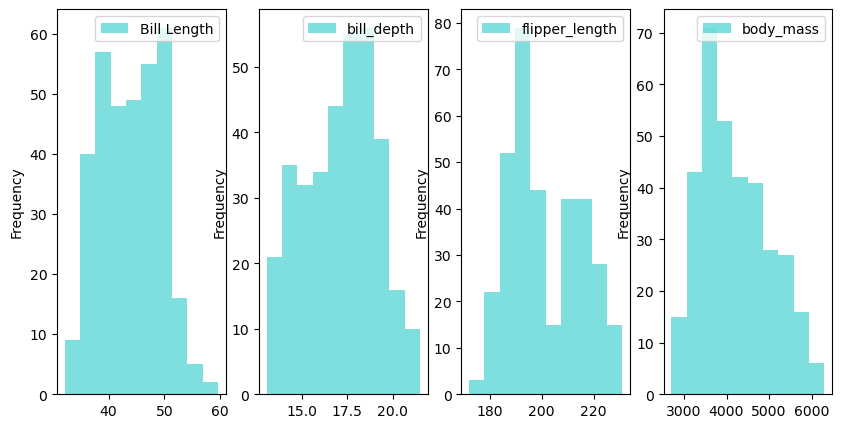

In [9]:
fig, ((ax, ax1, ax2, ax3)) = plt.subplots(ncols=4, nrows=1,  figsize=(10, 5))

df.plot(kind = 'hist', y = 'bill_length_mm', color='c', alpha = 0.5, label = 'Bill Length', ax=ax)
df.plot(kind = 'hist', y = 'bill_depth_mm', color='c', alpha = 0.5, label = 'bill_depth', ax=ax1)
df.plot(kind = 'hist', y = 'flipper_length_mm', color='c', alpha = 0.5, label = 'flipper_length', ax=ax2)
df.plot(kind = 'hist', y = 'body_mass_g', color='c', alpha = 0.5, label = 'body_mass', ax=ax3)

plt.show()


In [10]:
sex_count = df.sex.value_counts()
island_count = df.island.value_counts()
species_count = df.species.value_counts()

## Task 4: Coin Flips & Entropy

> Suppose you are flipping two coins, each with a probability p of giving heads. Plot the entropy of the total number of heads versus p.

In information theory, the entropy of a random variable is the average level of "information", "surprise", or "uncertainty" inherent to the variable's possible outcomes. 
https://en.wikipedia.org/wiki/Entropy_(information_theory)

This can be expressed by the following equation:
$ H(X) := - \sum_{x \in X} p(x) \log p(x) $


In [12]:
import numpy as np
#For one coin entropy as above.
def H(p):
    return -(1 - p) * np.log2(1.0 - p) - p * np.log2(p)

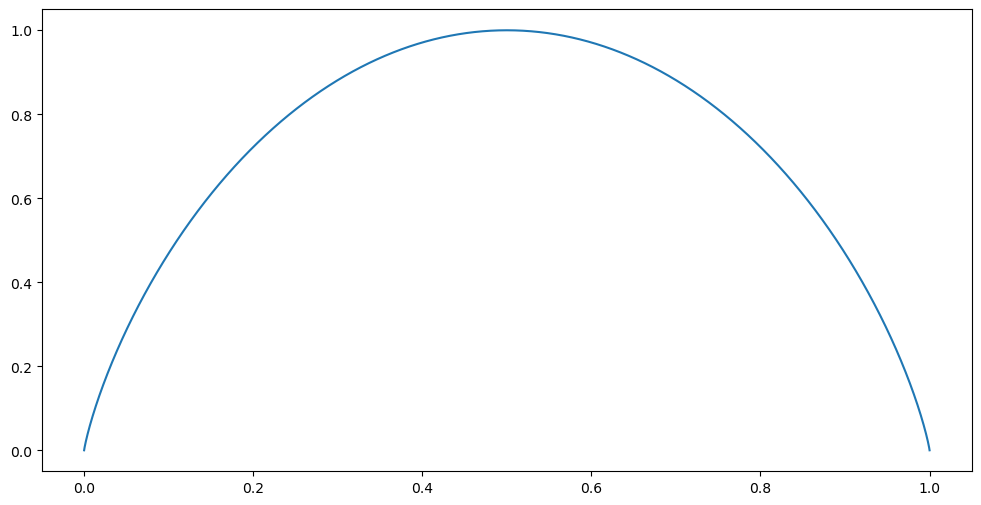

In [22]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12,6))

# p is a probability.
p = np.linspace(0.00000001, 0.99999999, 10001)


# Plot H(p).
ax.plot(p, H(p));

For two coins

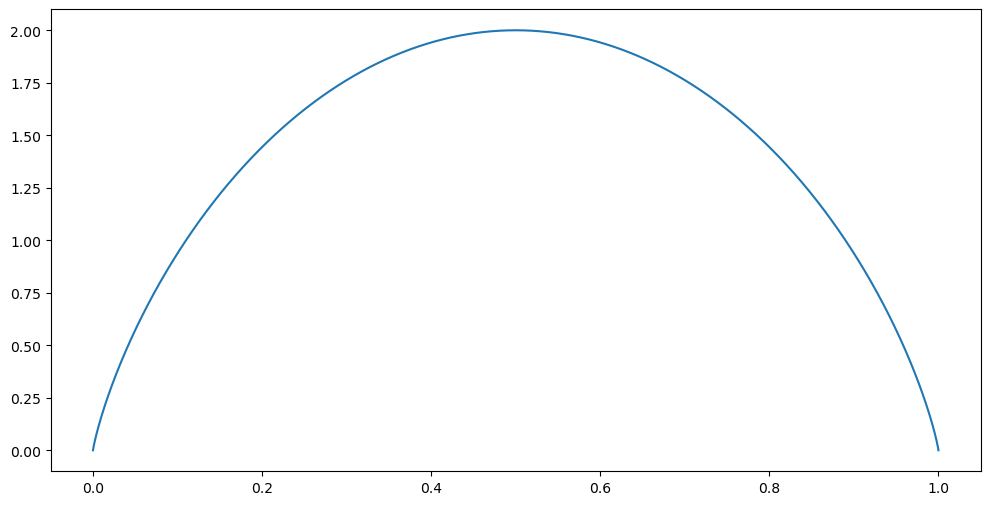

In [21]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12,6))

# p is a probability.
p = np.linspace(0.00000001, 0.99999999, 10001)


# Plot H(p1 + p2).
ax.plot(p, (H(p) + H(p)));

## Task 5: Penguins Data Set - Plots

> Create an appropriate individual plot for each of the variables in the penguin data set.

***

## End